In [5]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal


In [6]:
#24 sites
file_name = '2023_02_13*L24.npy' 
data = []
data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23/'+file_name))
data_path

['C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_00_35_01_403L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_50_143L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_50_147L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_50_73L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_50_896L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_51_523L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_51_545L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_52_133L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_52_830L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_53_750L24.npy',
 'C:/Users/wangy/Rydberg simulation/rydberg_data/2_13_23\\2023_02_13_14_17_53_92L24.npy',
 

In [7]:
for path in data_path:
    data.append(np.load(path,allow_pickle=True).tolist())

In [8]:
selected_data[0]['params']

NameError: name 'selected_data' is not defined

In [9]:
selected_data = []
for i in range(len(data)):
    if data[i]['params']['Omega']== 1.5 and len(data[i]['nT'])==146: #and np.array(data[i]['nT'])[:,3][-1]>4.5:
        selected_data.append(data[i])
# # del selected_data[1] #get rid of the uncompleted data
# # del selected_data[-1] #get rid of the uncompleted data

selected_data = sorted(selected_data, key=lambda selected_data: selected_data['params']['Delta_crit'])   # sort by age

N = []
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(selected_data)):
    N.append(selected_data[i]['params']['L'])
    t.append(np.array(selected_data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(selected_data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(selected_data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(selected_data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(selected_data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(selected_data[i]['z'])) # rydberg population  
    zz_list.append(np.array(selected_data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(selected_data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(selected_data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print('Delta_crit',selected_data[i]['params']['Delta_crit'])
    print(zzg_list[i].shape)
    print(t[i].shape)

i 0
Delta_crit 0.4
(146, 24, 24)
(146,)
i 1
Delta_crit 0.8
(146, 24, 24)
(146,)
i 2
Delta_crit 1.4
(146, 24, 24)
(146,)
i 3
Delta_crit 1.6
(146, 24, 24)
(146,)
i 4
Delta_crit 1.7
(146, 24, 24)
(146,)
i 5
Delta_crit 1.8
(146, 24, 24)
(146,)
i 6
Delta_crit 1.9
(146, 24, 24)
(146,)
i 7
Delta_crit 2.0
(146, 24, 24)
(146,)
i 8
Delta_crit 2.4
(146, 24, 24)
(146,)


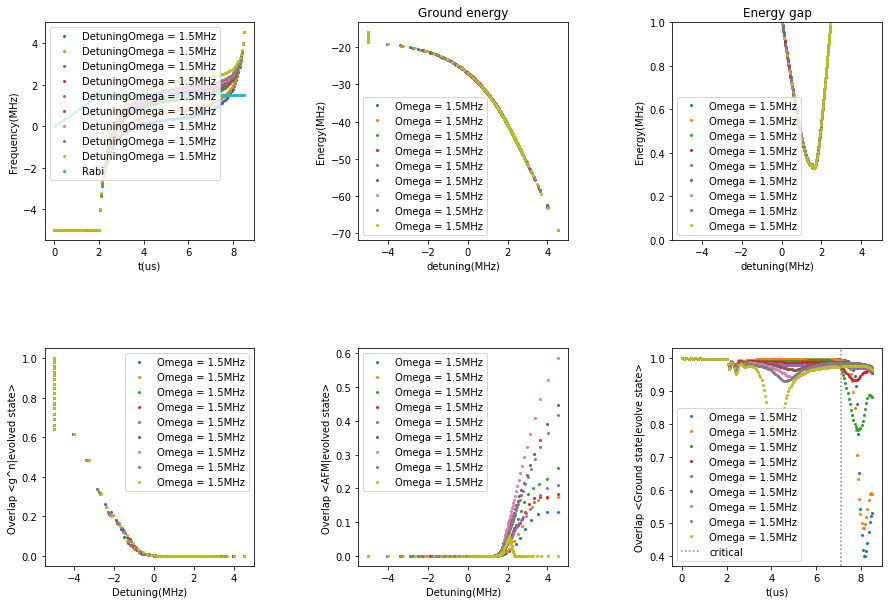

In [10]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
color_list = ['mistyrose', 'salmon','red','brown','black']
for i in range(len(N)):
    label0 ='Omega = '+ str((selected_data[i]['params']['Omega']))+'MHz'
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 )
   # print(np.array([t[i],detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi]).T)
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    #print(np.array([detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi]).T)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0)
    #ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi')

#ax[0,2].set_xlim([1.4,1.8])
#ax[0,2].set_ylim([0.35,0.4])



ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].set_ylim([0,1])
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



i = 0
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  133
crit_t7.875999999999972
crit_detuning1.6117766652611392
crit_gap0.3285014536923154
final_detuning4.5399999999996
final_gap3.1735305574887644
i = 1
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  130
crit_t7.719999999999973
crit_detuning1.5869303739649332
crit_gap0.3296056204972312
final_detuning4.5399999999996
final_gap3.1735305574843045
i = 2
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  119
crit_t7.1479999999999775
crit_detuning1.6011953834510981
crit_gap0.3286730924997089
final_detuning4.539999999999601
final_gap3.173530557501385
i = 3
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  108
crit_t6.575999999999982
crit_detuning1.6141478453802414
crit_gap0.32852377697165763
final_detuning4.5399999999996
final_gap3.1735305575242374
i = 4
Omega = 1MHz
intial_detuning-5.0
intial_gap5.0000000000000036
crit_id  93
crit_t5.795999999999988
crit_

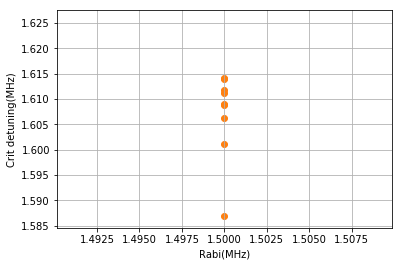

In [11]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    label0 ='Omega = '+ str(int(selected_data[i]['params']['Omega']))+'MHz'

    print(label0)
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
   # crit_id = np.argmin(abs(detuning[i]-(selected_data[i]['params']['Delta_crit'])))
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][0]))
    print('intial_gap'+str(gap[0]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))
    plt.scatter(selected_data[i]['params']['Omega'],detuning[i][crit_id],color = 'C1')
plt.xlabel('Rabi(MHz)')
plt.ylabel('Crit detuning(MHz)')
plt.grid(which = 'both')
          
    

In [12]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    print(i)
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zz'])):
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)

sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zg'])):
        n_temp = np.array(selected_data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

0
1
2
3
4
5
6
7
8


0.4MHz 1.37377631956165 [ 0.10425076 -0.91250342]
0.4MHz 1.4456346197784502 [ 0.10857258 -0.85407378]
0.4MHz 1.5245984857235424 [ 0.11275659 -0.79831689]
0.4MHz 1.6117766652611392 [ 0.11805106 -0.74891751]
0.4MHz 1.708521240560558 [ 0.12547057 -0.6996825 ]
0.4MHz 1.8164982583766818 [ 0.1352337  -0.64819107]
0.8MHz 1.385560712729502 [ 0.10728066 -0.82720572]
0.8MHz 1.4297457281256891 [ 0.11020572 -0.78749079]
0.8MHz 1.4776867330176577 [ 0.1134028  -0.74732712]
0.8MHz 1.5298839088248115 [ 0.11750926 -0.71009647]
0.8MHz 1.5869303739649332 [ 0.12284558 -0.67388017]
0.8MHz 1.6495348207577392 [ 0.12917512 -0.63592818]
0.8MHz 1.7185511076269595 [ 0.13574449 -0.59383691]
0.8MHz 1.7950174343919771 [ 0.1418548  -0.54861187]
1.4MHz 1.4012828629590464 [ 0.11149298 -0.58564388]
1.4MHz 1.4105078390021946 [ 0.1120383  -0.57305749]
1.4MHz 1.4201476022069204 [ 0.11228567 -0.56526008]
1.4MHz 1.4302307713948619 [ 0.11261087 -0.55998211]
1.4MHz 1.4407886601584436 [ 0.11350081 -0.55060311]
1.4MHz 1.4518556

1.8MHz 1.7778167107825984 [ 0.14955491 -0.09790487]
1.8MHz 1.7834105354193215 [ 0.14949138 -0.09323346]
1.8MHz 1.7888846909515548 [ 0.14981748 -0.0870637 ]
1.8MHz 1.7942429768728891 [ 0.15066835 -0.08088648]
1.8MHz 1.799489033516158 [ 0.15185096 -0.07763481]
1.8MHz 1.808270677881137 [ 0.15293891 -0.07643659]
1.8MHz 1.8178951871432103 [ 0.15377838 -0.07605003]
1.8MHz 1.8280291672930182 [ 0.1543791  -0.07465758]
1.8MHz 1.8387141711882655 [ 0.15473893 -0.07132063]
1.8MHz 1.8499963967513113 [ 0.15538694 -0.06690227]
1.8MHz 1.8619273547017656 [ 0.15656914 -0.06246292]
1.8MHz 1.8745646548833412 [ 0.15810165 -0.05967783]
1.8MHz 1.88797293650834 [ 0.15960871 -0.05740587]
1.9MHz 1.3993463870918488 [ 0.10901917 -0.74133102]
1.9MHz 1.4195771657538347 [ 0.113137   -0.71579158]
1.9MHz 1.4390080498869824 [ 0.11637795 -0.68341998]
1.9MHz 1.4576855597586516 [ 0.11790367 -0.64657851]
1.9MHz 1.475652676870988 [ 0.11770773 -0.61096278]
1.9MHz 1.4929491741705585 [ 0.11718352 -0.58105469]
1.9MHz 1.50961190

Text(0.53, 1.05, '6.5us Dilila ramp,Rabi = 1.5MHz')

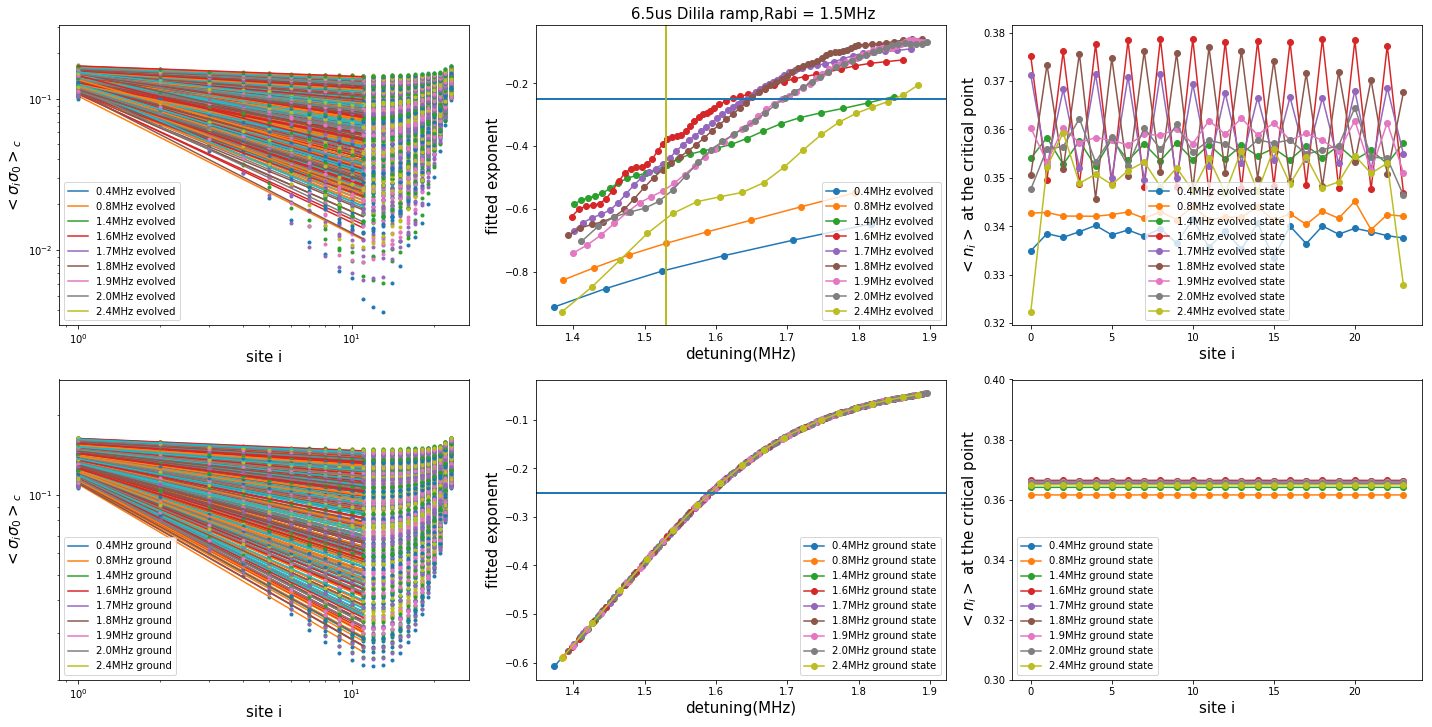

In [13]:
fs = 15
ms = 1
# the detuning range of interest
spacing = 1 # *0.052us
intial_detuning =1.4
final_detuning = 1.9
def power_law(x, a, b):
    return a * x**b
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(20,10))

for i_n,i in enumerate(range(len(N))):
    label0 =''+ str((selected_data[i]['params']['Delta_crit']))+'MHz'

    ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    initial_id = np.argmin(abs(detuning[i]-intial_detuning))
    final_id = np.argmin(abs(detuning[i]-final_detuning))
    #for it,t_id in enumerate(range(crit_id_list[i]-10,crit_id_list[i]+10,1)):
    for it,t_id in enumerate(range(initial_id,final_id,spacing)):

        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' )
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '')
#         print('aha',detuning[i][t_id])
#         print(sigma_2_list[i][t_id])
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        #print(sigma_2_list[i][t_id])
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        print(label0,detuning[i][t_id],params)
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        #print(detuning[i][t_id],params[1])
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)
        ax[0,1].axvline(1.53,color = 'C%d'%i_n)
        ax[0,0].plot(xfit, yfit, '-')
        ax[1,0].plot(xfit_g, yfit_g, '-')

    
#         if t_id == crit_id_list[i]:
#                 ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
#                 ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',zorder =1,label= label0+' evolved ')
 #   ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend(loc='lower right')
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

   #ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
title = str(selected_data[0]['params']['T_DiLILA'])+'us Dilila ramp,'+'Rabi = '+str(selected_data[0]['params']['Omega'])+'MHz'

ax[0,1].set_title(title,fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)
(146, 23)


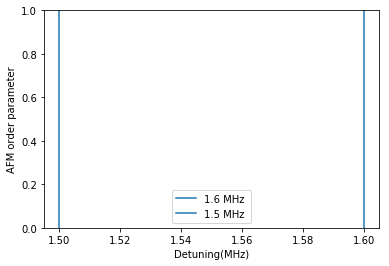

In [14]:
# sampled_x = np.arange(0,2.5,0.1)
# sampled_y = []

# sampled_x = np.array([1,1.5,1.55,1.6,1.65,1.8])
# sampled_y = np.array([0.72,2.35,2.5,2.7,2.87,3.5])
crit_list = []
detuning_list = []
y_list = []
for i_n,i in enumerate(range(len(N))):

    temp = sigma_2_list[i][:,1:]
    print(np.shape(temp))
    x = detuning[i][20:]
    y = np.sum(temp,axis=1)[20:]
    crit_list.append(selected_data[i]['params']['Delta_crit'])
#     if len(y)
    y_list.append(y)
   # print(len(y))
#     interp_func = interp1d(x, y)

#     interp_y = interp_func(sampled_x)
#     sampled_y.append(interp_y)
  #  plt.plot(x,y,marker = '^',markersize = 1, ls ='')
#     plt.plot(sampled_x,interp_y,marker = 'o',markersize = 4,ls ='')
#plt.yscale('log')
plt.axvline(1.6,label = '1.6 MHz')
plt.axvline(1.5,label = '1.5 MHz ')
plt.legend()
plt.ylabel('AFM order parameter')
plt.xlabel('Detuning(MHz)')
y_list = np.array(y_list)
crit_list = np.array(crit_list)
#plt.ylim([0.1,0.8])

2.058436215333597
0.08413769501141752


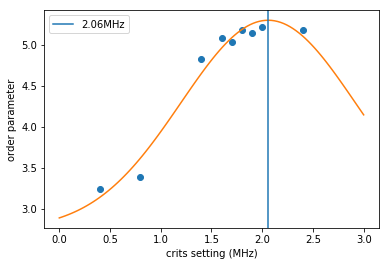

In [18]:
p,perr = curve_fit(fitfuc,crit_list,y_list[:,-1],p0=[1.8,1,2,0])
plt.plot(crit_list,y_list[:,-1],ls = '',marker = 'o')
testx = np.linspace(0,3,100)
testy = fitfuc(testx,*p)
plt.plot(testx,testy)
print(p[0])
plt.axvline(p[0],label = '2.06MHz')
print(perr[0,0]**0.5)
plt.xlabel('crits setting (MHz)')
plt.ylabel('order parameter')

plt.legend()

In [2]:
def fitfuc(x,x0,w,A,B):
    return A*np.exp(-(x-x0)**2/(w**2))+B

In [80]:
testx = np.linspace(0,3,100)
testy = fitfuc(testx,1.8,1,2,0)

In [15]:
crit_list

array([0.  , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.34, 1.44, 1.54, 1.62, 1.74,
       1.8 , 1.85, 2.  , 2.4 ])

In [100]:
sigma_2_list[i][-1][1:]

array([0.22400959, 0.2165135 , 0.20950577, 0.20164782, 0.19474238,
       0.18809267, 0.18214621, 0.17666461, 0.17224881, 0.16973241,
       0.16642877, 0.16604617, 0.16636133, 0.16863347, 0.17189814,
       0.17610827, 0.18089147, 0.18737493, 0.19411179, 0.20134704,
       0.208941  , 0.2164766 , 0.22343232])

In [99]:
sigma_2_list[i][-1][:]

array([0.24960157, 0.22400959, 0.2165135 , 0.20950577, 0.20164782,
       0.19474238, 0.18809267, 0.18214621, 0.17666461, 0.17224881,
       0.16973241, 0.16642877, 0.16604617, 0.16636133, 0.16863347,
       0.17189814, 0.17610827, 0.18089147, 0.18737493, 0.19411179,
       0.20134704, 0.208941  , 0.2164766 , 0.22343232])